# gym-anytrading

`AnyTrading` is a collection of [OpenAI Gym](https://github.com/openai/gym) environments for reinforcement learning-based trading algorithms.

Trading algorithms are mostly implemented in two markets: [FOREX](https://en.wikipedia.org/wiki/Foreign_exchange_market) and [Stock](https://en.wikipedia.org/wiki/Stock). AnyTrading aims to provide some Gym environments to improve and facilitate the procedure of developing and testing RL-based algorithms in this area. This purpose is obtained by implementing three Gym environments: **TradingEnv**, **ForexEnv**, and **StocksEnv**.

TradingEnv is an abstract environment which is defined to support all kinds of trading environments. ForexEnv and StocksEnv are simply two environments that inherit and extend TradingEnv. In the future sections, more explanations will be given about them but before that, some environment properties should be discussed.

**Note:** For experts, it is recommended to check out the [gym-mtsim](https://github.com/AminHP/gym-mtsim) project.

## Installation

### Via PIP
```bash
pip install gym-anytrading
```

### From Repository
```bash
git clone https://github.com/AminHP/gym-anytrading
cd gym-anytrading
pip install -e .

## or

pip install --upgrade --no-deps --force-reinstall https://github.com/AminHP/gym-anytrading/archive/master.zip
```

## Environment Properties
First of all, **you can't simply expect an RL agent to do everything for you and just sit back on your chair in such complex trading markets!**
Things need to be simplified as much as possible in order to let the agent learn in a faster and more efficient way. In all trading algorithms, the first thing that should be done is to define **actions** and **positions**. In the two following subsections, I will explain these actions and positions and how to simplify them.

### Trading Actions
If you search on the Internet for trading algorithms, you will find them using numerous actions such as **Buy**, **Sell**, **Hold**, **Enter**, **Exit**, etc.
Referring to the first statement of this section, a typical RL agent can only solve a part of the main problem in this area. If you work in trading markets you will learn that deciding whether to hold, enter, or exit a pair (in FOREX) or stock (in Stocks) is a statistical decision depending on many parameters such as your budget, pairs or stocks you trade, your money distribution policy in multiple markets, etc. It's a massive burden for an RL agent to consider all these parameters and may take years to develop such an agent! In this case, you certainly will not use this environment but you will extend your own.

So after months of work, I finally found out that these actions just make things complicated with no real positive impact. In fact, they just increase the learning time and an action like **Hold** will be barely used by a well-trained agent because it doesn't want to miss a single penny. Therefore there is no need to have such numerous actions and only `Sell=0` and `Buy=1` actions are adequate to train an agent just as well.

### Trading Positions
If you're not familiar with trading positions, refer [here](https://en.wikipedia.org/wiki/Position_\(finance\)). It's a very important concept and you should learn it as soon as possible.

In a simple vision: **Long** position wants to buy shares when prices are low and profit by sticking with them while their value is going up, and **Short** position wants to sell shares with high value and use this value to buy shares at a lower value, keeping the difference as profit.

Again, in some trading algorithms, you may find numerous positions such as **Short**, **Long**, **Flat**, etc. As discussed earlier, I use only `Short=0` and `Long=1` positions.

## Trading Environments
As I noticed earlier, now it's time to introduce the three environments. Before creating this project, I spent so much time to search for a simple and flexible Gym environment for any trading market but didn't find one. They were almost a bunch of complex codes with many unclear parameters that you couldn't simply look at them and comprehend what's going on. So I concluded to implement this project with a great focus on simplicity, flexibility, and comprehensiveness.

In the three following subsections, I will introduce our trading environments and in the next section, some IPython examples will be mentioned and briefly explained.

### TradingEnv
TradingEnv is an abstract class which inherits `gym.Env`. This class aims to provide a general-purpose environment for all kinds of trading markets. Here I explain its public properties and methods. But feel free to take a look at the complete [source code](https://github.com/AminHP/gym-anytrading/blob/master/gym_anytrading/envs/trading_env.py).

* Properties:
> `df`: An abbreviation for **DataFrame**. It's a **pandas'** DataFrame which contains your dataset and is passed in the class' constructor.
>
> `prices`: Real prices over time. Used to calculate profit and render the environment.
>
> `signal_features`: Extracted features over time. Used to create *Gym observations*.
>
> `window_size`: Number of ticks (current and previous ticks) returned as a *Gym observation*. It is passed in the class' constructor.
>
> `action_space`: The *Gym action_space* property. Containing discrete values of **0=Sell** and **1=Buy**.
>
> `observation_space`: The *Gym observation_space* property. Each observation is a window on `signal_features` from index **current_tick - window_size + 1** to **current_tick**. So `_start_tick` of the environment would be equal to `window_size`. In addition, initial value for `_last_trade_tick` is **window_size - 1** .
>
> `shape`: Shape of a single observation.
>
> `history`: Stores the information of all steps.

* Methods:
> `seed`: Typical *Gym seed* method.
>
> `reset`: Typical *Gym reset* method.
>
> `step`: Typical *Gym step* method.
>
> `render`: Typical *Gym render* method. Renders the information of the environment's current tick.
>
> `render_all`: Renders the whole environment.
>
> `close`: Typical *Gym close* method.

* Abstract Methods:
> `_process_data`: It is called in the constructor and returns `prices` and `signal_features` as a tuple. In different trading markets, different features need to be obtained. So this method enables our TradingEnv to be a general-purpose environment and specific features can be returned for specific environments such as *FOREX*, *Stocks*, etc.
>
> `_calculate_reward`: The reward function for the RL agent.
>
> `_update_profit`: Calculates and updates total profit which the RL agent has achieved so far. Profit indicates the amount of units of currency you have achieved by starting with *1.0* unit (Profit = FinalMoney / StartingMoney).
>
> `max_possible_profit`: The maximum possible profit that an RL agent can obtain regardless of trade fees.

### ForexEnv
This is a concrete class which inherits TradingEnv and implements its abstract methods. Also, it has some specific properties for the *FOREX* market. For more information refer to the [source code](https://github.com/AminHP/gym-anytrading/blob/master/gym_anytrading/envs/forex_env.py).

* Properties:
> `frame_bound`: A tuple which specifies the start and end of `df`. It is passed in the class' constructor.
>
> `unit_side`: Specifies the side you start your trading. Containing string values of **left** (default value) and **right**. As you know, there are two sides in a currency pair in *FOREX*. For example in the *EUR/USD* pair, when you choose the `left` side, your currency unit is *EUR* and you start your trading with 1 EUR. It is passed in the class' constructor.
>
> `trade_fee`: A default constant fee which is subtracted from the real prices on every trade.


### StocksEnv
Same as ForexEnv but for the *Stock* market. For more information refer to the [source code](https://github.com/AminHP/gym-anytrading/blob/master/gym_anytrading/envs/stocks_env.py).

* Properties:
> `frame_bound`: A tuple which specifies the start and end of `df`. It is passed in the class' constructor.
>
> `trade_fee_bid_percent`: A default constant fee percentage for bids. For example with trade_fee_bid_percent=0.01, you will lose 1% of your money every time you sell your shares.
>
> `trade_fee_ask_percent`: A default constant fee percentage for asks. For example with trade_fee_ask_percent=0.005, you will lose 0.5% of your money every time you buy some shares.

Besides, you can create your own customized environment by extending TradingEnv or even ForexEnv or StocksEnv with your desired policies for calculating reward, profit, fee, etc.


## Create an environment after preprocessing

In [11]:
import gymnasium as gym
import gym_anytrading

In [12]:
import os
import pandas as pd
import numpy as np
os.chdir('/home/ishta/Analyzing-and-predicting-the-volatile-market-patterns-for-trading/Notebooks_RL_trading')

In [14]:
data = pd.read_csv('Datasets/eurusd_hour.csv')

In [15]:
data

,Date,Time,BO,BH,BL,BC,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080
1,2005-05-02,01:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020
2,2005-05-02,02:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080
3,2005-05-02,03:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000
4,2005-05-02,04:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030
...,...,...,...,...,...,...,...,...,...,...,...,...
93079,2020-04-29,18:00,1.08620,1.08851,1.08611,1.08713,0.00093,1.08660,1.08865,1.08640,1.08726,0.00066
93080,2020-04-29,19:00,1.08711,1.08823,1.08659,1.08748,0.00037,1.08725,1.08837,1.08675,1.08760,0.00035
93081,2020-04-29,20:00,1.08747,1.08788,1.08691,1.08708,-0.00039,1.08758,1.08810,1.08706,1.08808,0.00050
93082,2020-04-29,21:00,1.08708,1.08740,1.08699,1.08714,0.00006,1.08808,1.08814,1.08763,1.08766,-0.00042


In [16]:
data.rename(columns={'BC': 'Close'}, inplace=True)

In [17]:
data

,Date,Time,BO,BH,BL,Close,BCh,AO,AH,AL,AC,ACh
0,2005-05-02,00:00,1.28520,1.28520,1.28400,1.28440,-0.00080,1.28540,1.28540,1.28420,1.28460,-0.00080
1,2005-05-02,01:00,1.28440,1.28480,1.28390,1.28420,-0.00020,1.28460,1.28500,1.28410,1.28440,-0.00020
2,2005-05-02,02:00,1.28430,1.28540,1.28410,1.28510,0.00080,1.28450,1.28560,1.28430,1.28530,0.00080
3,2005-05-02,03:00,1.28510,1.28590,1.28500,1.28510,0.00000,1.28530,1.28610,1.28520,1.28530,0.00000
4,2005-05-02,04:00,1.28520,1.28590,1.28490,1.28550,0.00030,1.28540,1.28610,1.28510,1.28570,0.00030
...,...,...,...,...,...,...,...,...,...,...,...,...
93079,2020-04-29,18:00,1.08620,1.08851,1.08611,1.08713,0.00093,1.08660,1.08865,1.08640,1.08726,0.00066
93080,2020-04-29,19:00,1.08711,1.08823,1.08659,1.08748,0.00037,1.08725,1.08837,1.08675,1.08760,0.00035
93081,2020-04-29,20:00,1.08747,1.08788,1.08691,1.08708,-0.00039,1.08758,1.08810,1.08706,1.08808,0.00050
93082,2020-04-29,21:00,1.08708,1.08740,1.08699,1.08714,0.00006,1.08808,1.08814,1.08763,1.08766,-0.00042


In [22]:
forex_env = gym.make(
    'forex-v0',
    df=data,
    window_size=10,
    frame_bound=(10, 93084),
    unit_side='left'
)

- It is to be noted that the first element of `frame_bound` should be greater than or equal to `window_size`.

### Print some information

In [23]:
print()
print("forex_env information:")
print("> shape:", forex_env.unwrapped.shape)
print("> df.shape:", forex_env.unwrapped.df.shape)
print("> prices.shape:", forex_env.unwrapped.prices.shape)
print("> signal_features.shape:", forex_env.unwrapped.signal_features.shape)
print("> max_possible_profit:", forex_env.unwrapped.max_possible_profit())


forex_env information:
> shape: (10, 2)
> df.shape: (93084, 12)
> prices.shape: (93084,)
> signal_features.shape: (93084, 2)
> max_possible_profit: 12169621677796.877


#### reset  Method:
- Resets the environment to the initial state.
- Seeds the random number generator for reproducibility.
- Initializes various internal variables.

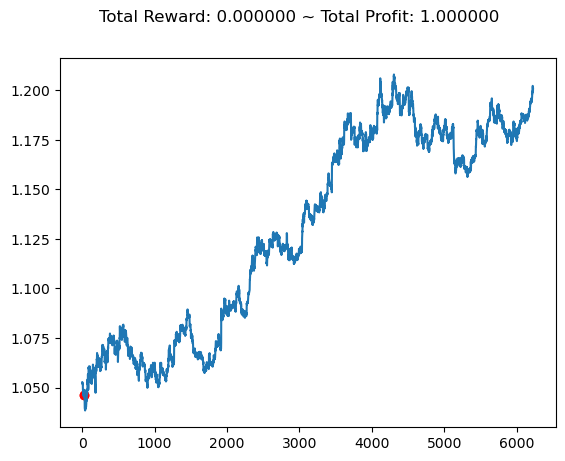

In [24]:
env.reset()
env.render()

- **Short** and **Long** positions are shown in `red` and `green` colors.
- As you see, the starting *position* of the environment is always **Short**.

### Trading Positions
If you're not familiar with trading positions, refer here. It's a very important concept and you should learn it as soon as possible.

In a simple vision: Long position wants to buy shares when prices are low and profit by sticking with them while their value is going up, and Short position wants to sell shares with high value and use this value to buy shares at a lower value, keeping the difference as profit.

Again, in some trading algorithms, you may find numerous positions such as Short, Long, Flat, etc. As discussed earlier, I use only Short=0 and Long=1 positions.